In [1]:
from pprint import pprint
import seaborn as sns
import numpy as np
from sqlalchemy import PickleType
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import pickle
import logging
import yaml

from utils.data_storage.dataframe2sql import read_pkl_sql
from utils.config.loaders import get_sql_types

sns.set_theme()
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [2]:
dtypes = get_sql_types()
dtypes["value_history"] = PickleType

In [38]:
df = read_pkl_sql("pretty_plots.db", "camel_hpsearch", dtypes=dtypes)
df.columns = df.columns.astype(str)
clean_df = df.dropna(subset=["variance_ratio", "s"]).sort_values("variance_ratio", ascending=False)
clean_df["d_cat"] = clean_df["d"].astype(str)
matched = clean_df[clean_df["match"]] # & (clean_df["masking"] == "checkerboard")
better = matched.groupby(["d","s"]).head(20)
best = matched.groupby(["d","s"]).head(1)

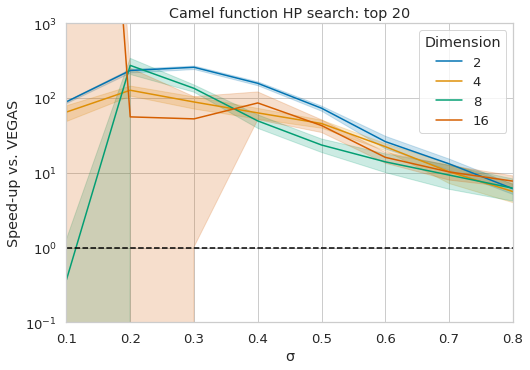

In [39]:
ax = sns.lineplot(data=better, x="s", y="variance_ratio", hue="d_cat", ci="sd", palette="colorblind",
                 hue_order=[str(d) for d in sorted(better["d"].unique())])
ax.legend(title="Dimension",  loc="upper right")
ax.set(yscale="log",xlim=[0.1, 0.8], ylim=[1.e-1, 1.e3])
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search: top 20")
ax.plot([0,1],[1,1], c="black", linestyle="dashed")
ax.get_figure().set_size_inches(8,5.5)
plt.show()

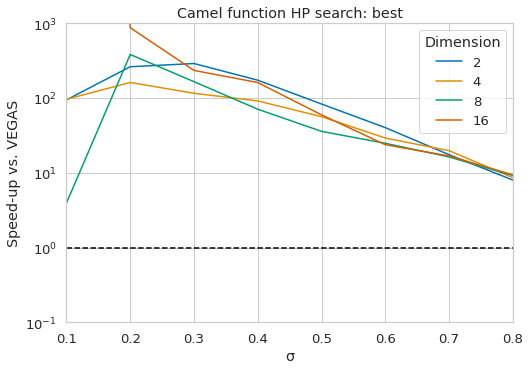

In [40]:
ax = sns.lineplot(data=best, x="s", y="variance_ratio", hue="d_cat", ci="sd", palette="colorblind",
                 hue_order=[str(d) for d in sorted(best["d"].unique())])
ax.legend(title="Dimension",  loc="upper right")
ax.set(yscale="log",xlim=[0.1, 0.8], ylim=[1.e-1, 1.e3])
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search: best")
ax.plot([0,1],[1,1], c="black", linestyle="dashed")
ax.get_figure().set_size_inches(8,5.5)
plt.show()

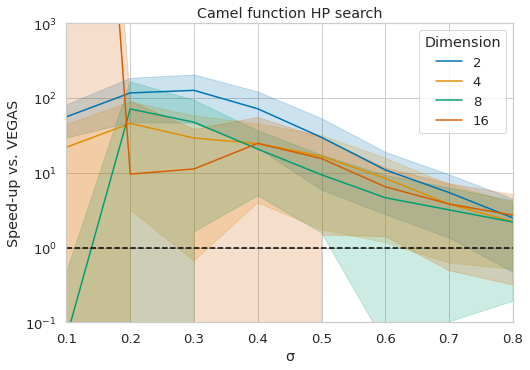

In [41]:
ax = sns.lineplot(data=matched, x="s", y="variance_ratio", hue="d_cat", ci="sd", palette="colorblind", hue_order=[str(d) for d in sorted(matched["d"].unique())])
ax.legend(title="Dimension",  loc="upper right")
ax.set(yscale="log",xlim=[0.1, 0.8], ylim=[1.e-1, 1.e3])
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.plot([0,1],[1,1], c="black", linestyle="dashed")
ax.get_figure().set_size_inches(8,5.5)
plt.show()

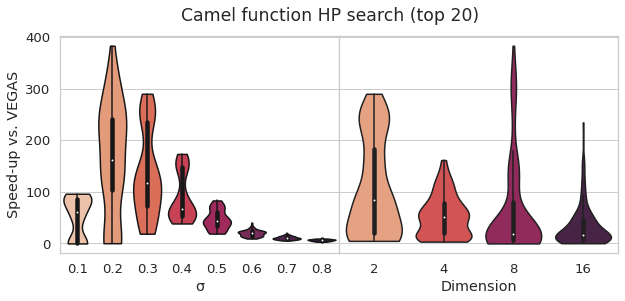

In [42]:
vbetter = better[(better["variance_ratio"] < 500)]
fig, axs = plt.subplots(1,2, sharey=True, gridspec_kw={"wspace":0})
fig.suptitle("Camel function HP search (top 20)")
sns.violinplot(data=vbetter, x="s", y="variance_ratio", cut=0, scale="width", ax=axs[0], palette="rocket_r")
axs[0].set(xlabel="σ", ylabel="Speed-up vs. VEGAS")
sns.violinplot(data=vbetter, x="d", y="variance_ratio", cut=0, scale="width", ax=axs[1], palette="rocket_r")
axs[1].set(xlabel="Dimension", ylabel="")
fig.set_size_inches(10,4)
plt.show()

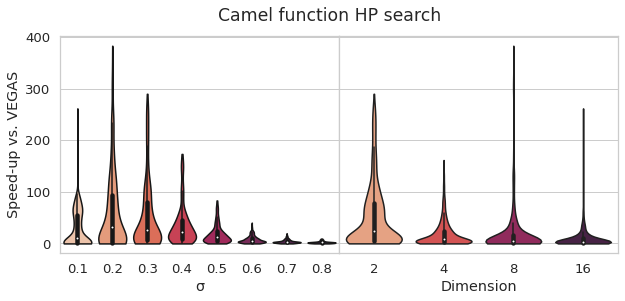

In [43]:
vmatched = matched[(matched["variance_ratio"] < 500)]
fig, axs = plt.subplots(1,2, sharey=True, gridspec_kw={"wspace":0})
fig.suptitle("Camel function HP search")
sns.violinplot(data=vmatched, x="s", y="variance_ratio", cut=0, scale="width", ax=axs[0], palette="rocket_r")
axs[0].set(xlabel="σ", ylabel="Speed-up vs. VEGAS")
sns.violinplot(data=vmatched, x="d", y="variance_ratio", cut=0, scale="width", ax=axs[1], palette="rocket_r")
axs[1].set(xlabel="Dimension", ylabel="")
fig.set_size_inches(10,4)
plt.show()

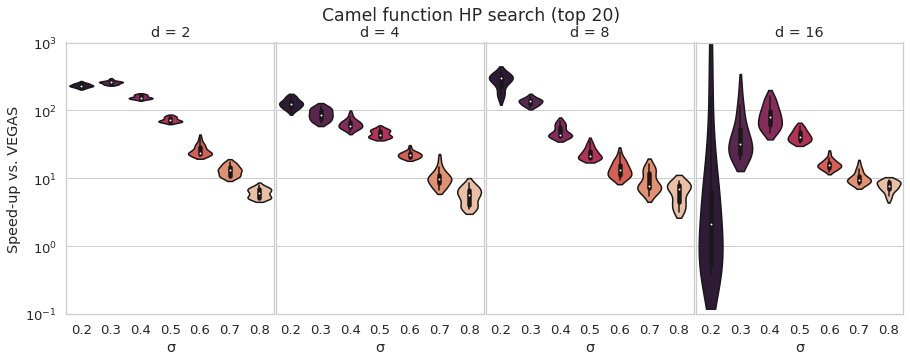

In [44]:
vbetter = better[(better["variance_ratio"] < 1000) & (better["s"]>0.1)]
vbetter = vbetter.assign(lvr=vbetter.loc[:,"variance_ratio"].apply(np.log10).values)
dims = list(vbetter["d"].unique())
dims.sort()
fig, axs = plt.subplots(1,4, sharey="row", gridspec_kw={"wspace":.01, "hspace":.3})
fig.suptitle("Camel function HP search (top 20)")
for i in range(len(axs)):
    sns.violinplot(data=vbetter[vbetter["d"]==dims[i]], x="s", y="lvr", cut=1, scale="width", ax=axs[i], palette="rocket")
    axs[i].set(xlabel="σ", title=f"d = {dims[i]}", ylabel="")
axs[0].set(ylabel="Speed-up vs. VEGAS", ylim=(-1,3))
axs[0].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
axs[0].yaxis.set_ticks(list(range(-1,4)),minor=False)
fig.set_size_inches(15,5)
plt.show()

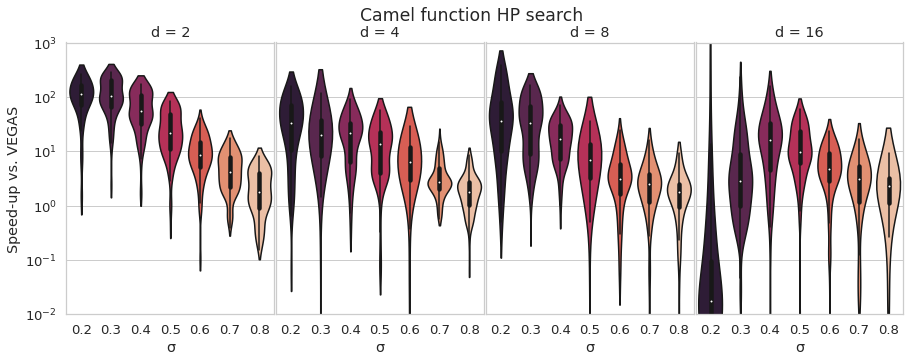

In [45]:
vmatched = matched[(matched["variance_ratio"] < 1000) & (matched["s"]>0.1)]
vmatched = vmatched.assign(lvr=vmatched.loc[:,"variance_ratio"].apply(np.log10).values)
dims = list(vbetter["d"].unique())
dims.sort()
fig, axs = plt.subplots(1,4, sharey="row", gridspec_kw={"wspace":.01, "hspace":.3})
fig.suptitle("Camel function HP search")
for i in range(len(axs)):
    sns.violinplot(data=vmatched[vmatched["d"]==dims[i]], x="s", y="lvr", cut=1, scale="width", ax=axs[i], palette="rocket")
    axs[i].set(xlabel="σ", title=f"d = {dims[i]}", ylabel="")
axs[0].set(ylabel="Speed-up vs. VEGAS", ylim=(-2,3))
axs[0].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
fig.set_size_inches(15,5)
plt.show()

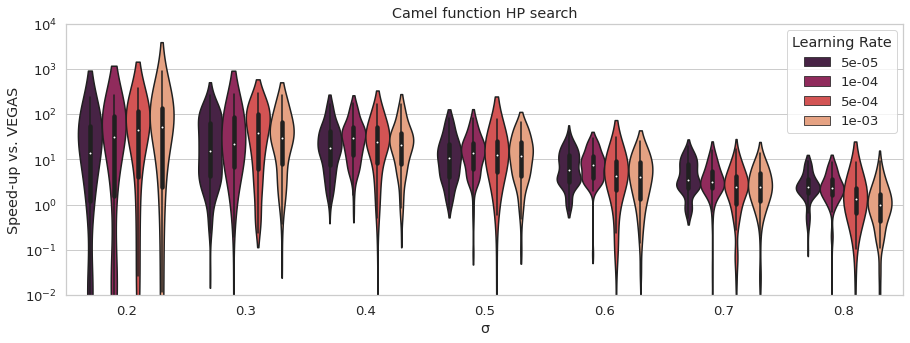

In [46]:
ax = sns.violinplot(data=vmatched, x="s", y="lvr", hue="lr", scale="width", cut=1, palette="rocket")
ax.set(ylim=(-2,4))
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
legend = ax.legend(loc="upper right", title="Learning Rate", frameon=True)
for lbl in legend.get_texts():
    lr = float(lbl.get_text())
    lbl.set_text(f"{lr:.0e}")
ax.get_figure().set_size_inches(15,5)

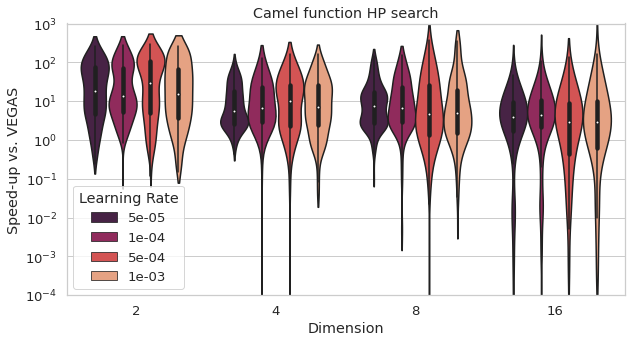

In [47]:
ax = sns.violinplot(data=vmatched, x="d", y="lvr", hue="lr", scale="width", cut=1, palette="rocket")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.get_figure().set_size_inches(10,5)
ax.set(ylim=(-4,3))
ax.set(xlabel="Dimension", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
legend = ax.legend(loc="lower left", title="Learning Rate", frameon=True)
for lbl in legend.get_texts():
    lr = float(lbl.get_text())
    lbl.set_text(f"{lr:.0e}")
plt.show()

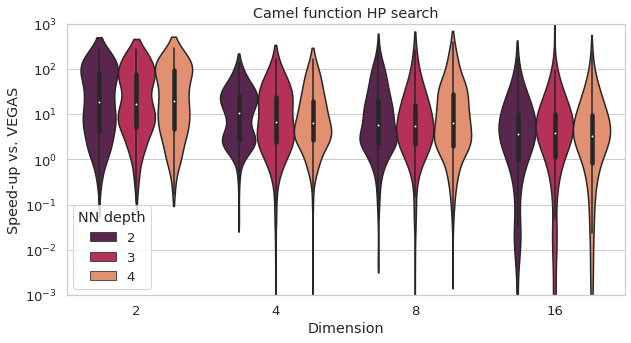

In [48]:
ax = sns.violinplot(data=vmatched, x="d", y="lvr", hue="n_hidden", scale="width", cut=1, palette="rocket")
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.get_figure().set_size_inches(10,5)
ax.set(ylim=(-3,3))
ax.set(xlabel="Dimension", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
legend = ax.legend(loc="lower left", title="NN depth", frameon=True)
plt.show()

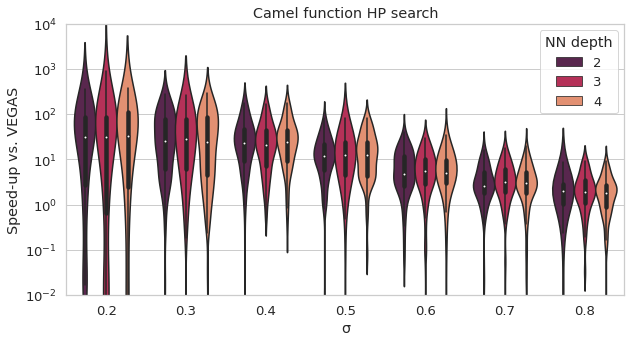

In [49]:
ax = sns.violinplot(data=vmatched, x="s", y="lvr", hue="n_hidden", scale="width", palette="rocket")
ax.set(ylim=(-2,4))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.legend(loc="upper right", title="NN depth")
ax.get_figure().set_size_inches(10,5)

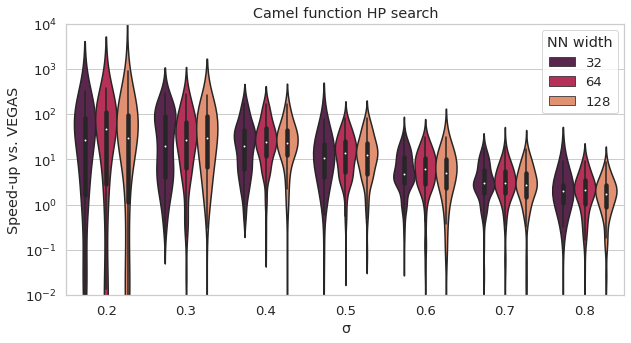

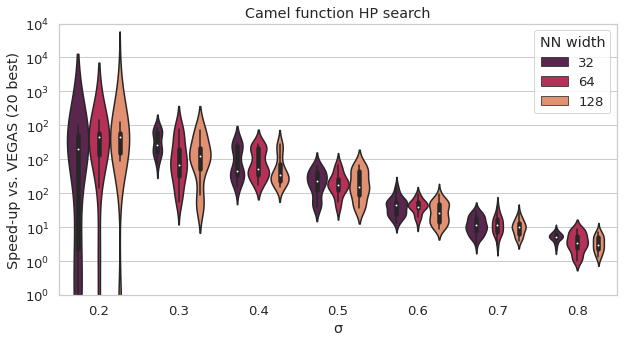

In [50]:
ax = sns.violinplot(data=vmatched, x="s", y="lvr", hue="d_hidden", scale="width", palette="rocket")
ax.set(ylim=(-2,4))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.legend(loc="upper right", title="NN width")
ax.get_figure().set_size_inches(10,5)
plt.show()

ax = sns.violinplot(data=vbetter, x="s", y="lvr", hue="d_hidden", palette="rocket", scale="count")
ax.set(ylim=(0,4))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS (20 best)", title="Camel function HP search")
ax.legend(loc="upper right", title="NN width")
ax.get_figure().set_size_inches(10,5)
plt.show()

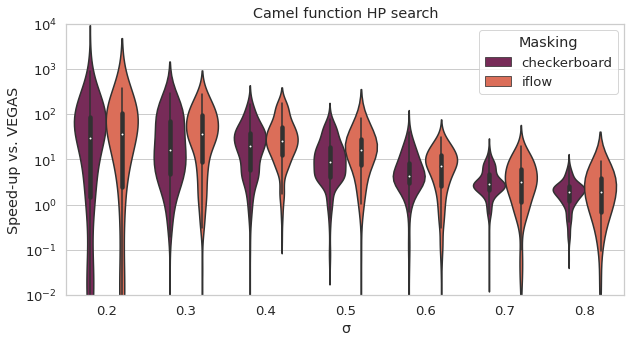

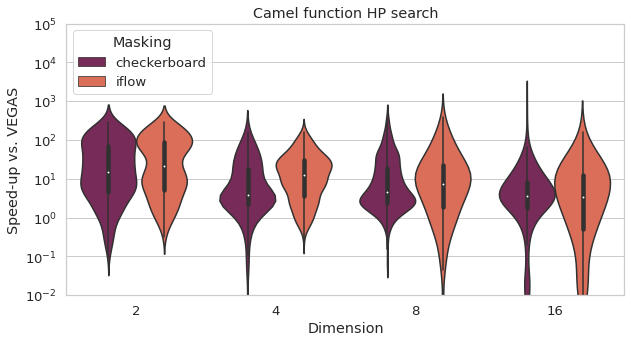

In [51]:
ax = sns.violinplot(data=vmatched, x="s", y="lvr", hue="masking", scale="width", palette="rocket")
ax.set(ylim=(-2,4))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.legend(loc="upper right", title="Masking")
ax.get_figure().set_size_inches(10,5)
plt.show()

ax = sns.violinplot(data=vmatched, x="d", y="lvr", hue="masking", scale="width", palette="rocket")
ax.set(ylim=(-2,5))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="Dimension", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.legend(loc="upper left", title="Masking")
ax.get_figure().set_size_inches(10,5)
plt.show()

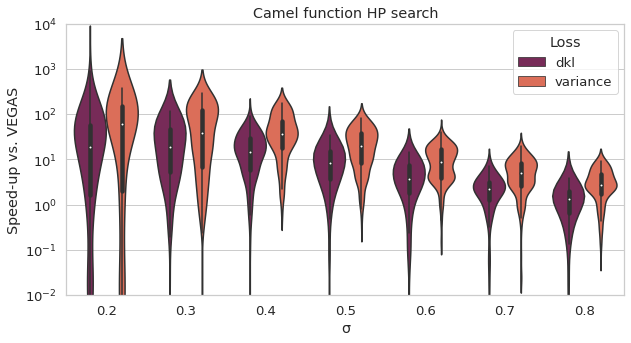

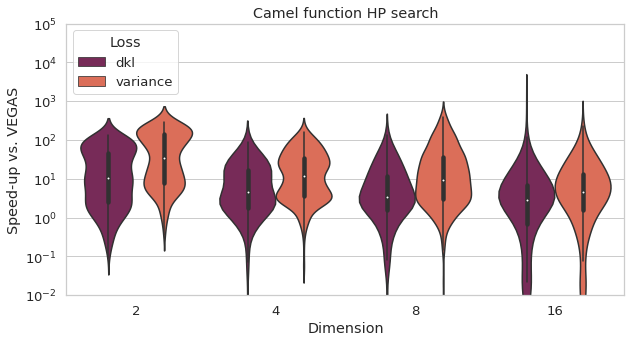

In [52]:
ax = sns.violinplot(data=vmatched, x="s", y="lvr", hue="loss", scale="width", palette="rocket")
ax.set(ylim=(-2,4))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="σ", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.legend(loc="upper right", title="Loss")
ax.get_figure().set_size_inches(10,5)
plt.show()

ax = sns.violinplot(data=vmatched, x="d", y="lvr", hue="loss", scale="width", palette="rocket")
ax.set(ylim=(-2,5))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.set(xlabel="Dimension", ylabel="Speed-up vs. VEGAS", title="Camel function HP search")
ax.legend(loc="upper left", title="Loss")
ax.get_figure().set_size_inches(10,5)
plt.show()

In [53]:
vdf = (matched[matched["value"] > 10*matched["value_std"]])
vdf.groupby(["d","s"])["variance_ratio"].max()

d   s  
2   0.1     94.594036
    0.2    262.498937
    0.3    289.918487
    0.4    173.386289
    0.5     83.245480
    0.6     40.230998
    0.7     17.469513
    0.8      7.998301
4   0.1     96.279943
    0.2    161.519574
    0.3    115.914424
    0.4     91.627048
    0.5     56.400429
    0.6     29.194829
    0.7     19.784273
    0.8      8.610757
8   0.1      0.016427
    0.2    382.995715
    0.3    165.845958
    0.4     70.906762
    0.5     35.860836
    0.6     24.822148
    0.7     16.294763
    0.8      9.210711
16  0.3    119.141830
    0.4    161.363385
    0.5     59.594201
    0.6     23.760284
    0.7     16.789022
    0.8      9.387690
Name: variance_ratio, dtype: float64

In [54]:
hp_choices = vdf.loc[vdf.groupby(["d","s"])["variance_ratio"].idxmax().values]

In [55]:
hp_choices.columns

Index(['value', 'target', 'value_std', 'target_std', 'sigma_cutoff',
       'sigmas_off', 'percent_difference', 'variance_ratio', 'match',
       'value_history', 'target_history', 'flat_variance_ratio', 'flow',
       'd_hidden', 'n_bins', 'n_hidden', 'masking', 'repetitions', 'loss',
       'n_points_survey', 'n_iter', 'minibatch_size', 'max_reloads',
       'n_epochs', 'optim_cls', 'betas', 'eps', 'lr', 'checkpoint',
       'checkpoint_on_cuda', 's', 'norm', 'd', 'git_info', 'extra_data',
       'd_cat'],
      dtype='object')

In [56]:
integrator_columns = ['d_hidden',
                      'n_bins',
                      'n_hidden',
                      'masking',
                      'repetitions',
                      'loss',
                      'n_points_survey',
                      'n_iter',
                      'minibatch_size',
                      'n_epochs',
                      'lr',
                        'd',
                         's']

In [65]:
conf = {
    "dimensions": [],
    "integrand_params_grid": {
        "s": []
    },
    "integrator_config_grid": dict()
}
for idx, value in hp_choices[integrator_columns].set_index(["s","d"]).iterrows():
    d = idx[1]
    s = idx[0]
    integrator_config = value.to_dict()
    conf["dimensions"].append(d)
    conf["integrand_params_grid"]["s"].append(s)
    
    for param_name in integrator_config:
        if param_name in conf["integrator_config_grid"]:
            conf["integrator_config_grid"][param_name].append(integrator_config[param_name])
        else:
            conf["integrator_config_grid"][param_name] = [integrator_config[param_name]]

In [70]:
with open("pretty_plot_camel_hp_winners.yaml","w") as outfile:
    yaml.dump(conf, outfile, default_flow_style=None)

In [72]:
len(conf["dimensions"])

30